In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [6]:
df = wrangle.wrangle_zillow()
df

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,taxamount,county
0,4.0,4.0,2954.0,735227.0,1924.0,9057.14,Los_Angeles
1,4.0,2.0,1390.0,429900.0,1962.0,4892.26,Orange
2,2.0,1.0,823.0,148542.0,1986.0,2666.78,Los_Angeles
3,4.0,3.0,2966.0,654241.0,2001.0,8008.59,Los_Angeles
4,2.0,2.0,1540.0,456340.0,1938.0,5651.44,Los_Angeles
...,...,...,...,...,...,...,...
52436,4.0,2.5,2504.0,809000.0,1968.0,8967.94,Orange
52437,4.0,2.0,1881.0,449245.0,1974.0,5743.88,Los_Angeles
52438,3.0,3.0,2352.0,870753.0,1907.0,10503.67,Los_Angeles
52439,2.0,1.0,1468.0,268292.0,1932.0,3284.39,Los_Angeles


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48372 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     48372 non-null  float64
 1   bathrooms    48372 non-null  float64
 2   squarefeet   48372 non-null  float64
 3   total_taxes  48372 non-null  float64
 4   yearbuilt    48372 non-null  float64
 5   taxamount    48372 non-null  float64
 6   county       48372 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.0+ MB


In [8]:
df.head()

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,taxamount,county
0,4.0,4.0,2954.0,735227.0,1924.0,9057.14,Los_Angeles
1,4.0,2.0,1390.0,429900.0,1962.0,4892.26,Orange
2,2.0,1.0,823.0,148542.0,1986.0,2666.78,Los_Angeles
3,4.0,3.0,2966.0,654241.0,2001.0,8008.59,Los_Angeles
4,2.0,2.0,1540.0,456340.0,1938.0,5651.44,Los_Angeles


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
# splitting my data
'''
This function performs split on zillow data, stratify taxvaluedollarcnt.
Returns train, validate, and test dfs.
'''
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123) 
#                                         stratify=)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
#                                    stratify=train_validate)

In [11]:
train.shape, validate.shape, test.shape

((27087, 7), (11610, 7), (9675, 7))

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

In [12]:
columns_to_scale = train[["bedrooms","bathrooms","squarefeet","total_taxes"]]
columns_to_scale.head()

,bedrooms,bathrooms,squarefeet,total_taxes
15738,3.0,2.0,1855.0,67857.0
32066,3.0,1.0,1082.0,295125.0
23254,4.0,3.0,3294.0,717274.0
22616,3.0,1.5,1426.0,318217.0
50357,4.0,3.0,2612.0,396546.0


In [13]:
X_train, X_validate= columns_to_scale, columns_to_scale
y_train, y_validate = columns_to_scale, columns_to_scale

In [14]:
# fitting the scaled data no nead to scale target
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.head()

,0,1,2,3
0,0.500000,0.333333,0.293216,0.055761
1,0.500000,0.166667,0.160124,0.245309
2,0.666667,0.500000,0.540978,0.597393
3,0.500000,0.250000,0.219353,0.264568
4,0.666667,0.500000,0.423554,0.329897


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

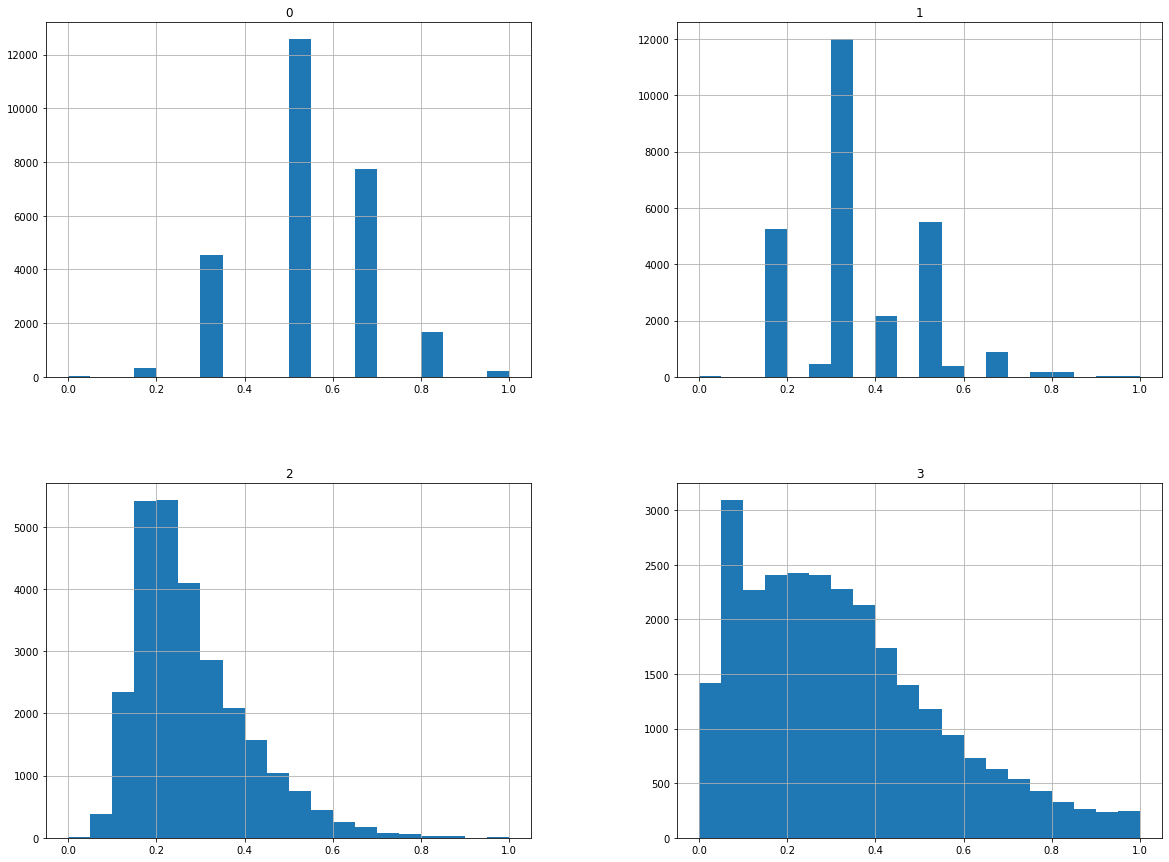

In [15]:
X_train_scaled_df.hist(bins = 20,figsize =  (20,15))

In [16]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    X_train_scaled = X_train_scaled.copy()
    X_train_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
X_train_scaled

array([[0.5       , 0.33333333, 0.29321625, 0.05576063],
       [0.5       , 0.16666667, 0.16012397, 0.24530859],
       [0.66666667, 0.5       , 0.54097796, 0.59739283],
       ...,
       [0.33333333, 0.33333333, 0.22865014, 0.49818932],
       [0.66666667, 0.33333333, 0.3161157 , 0.3923603 ],
       [0.66666667, 0.41666667, 0.43508953, 0.38929525]])

In [19]:
X_train_inverse = pd.DataFrame(scaler.inverse_transform(X_train_scaled))
X_train_inverse

,0,1,2,3
0,3.0,2.0,1855.0,67857.0
1,3.0,1.0,1082.0,295125.0
2,4.0,3.0,3294.0,717274.0
3,3.0,1.5,1426.0,318217.0
4,4.0,3.0,2612.0,396546.0
...,...,...,...,...
27082,4.0,3.0,2045.0,72435.0
27083,2.0,2.0,1068.0,184066.0
27084,2.0,2.0,1480.0,598329.0
27085,4.0,2.0,1988.0,471440.0


In [20]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_validate_scaled = scaler.fit_transform(X_validate)

scaler2 = StandardScaler()
X_train_standard_scale = scaler2.fit_transform(X_train)
X_validate_standard_scale = scaler2.fit_transform(X_validate)
X_train_s_scaled_df = pd.DataFrame(X_train_standard_scale)
X_train_s_scaled_df.head()

,0,1,2,3
0,-0.273762,-0.203891,0.104992,-1.227775
1,-0.273762,-1.406854,-0.946082,-0.368499
2,0.863743,0.999072,2.061647,1.227601
3,-0.273762,-0.805373,-0.478334,-0.281191
4,0.863743,0.999072,1.134309,0.014962


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

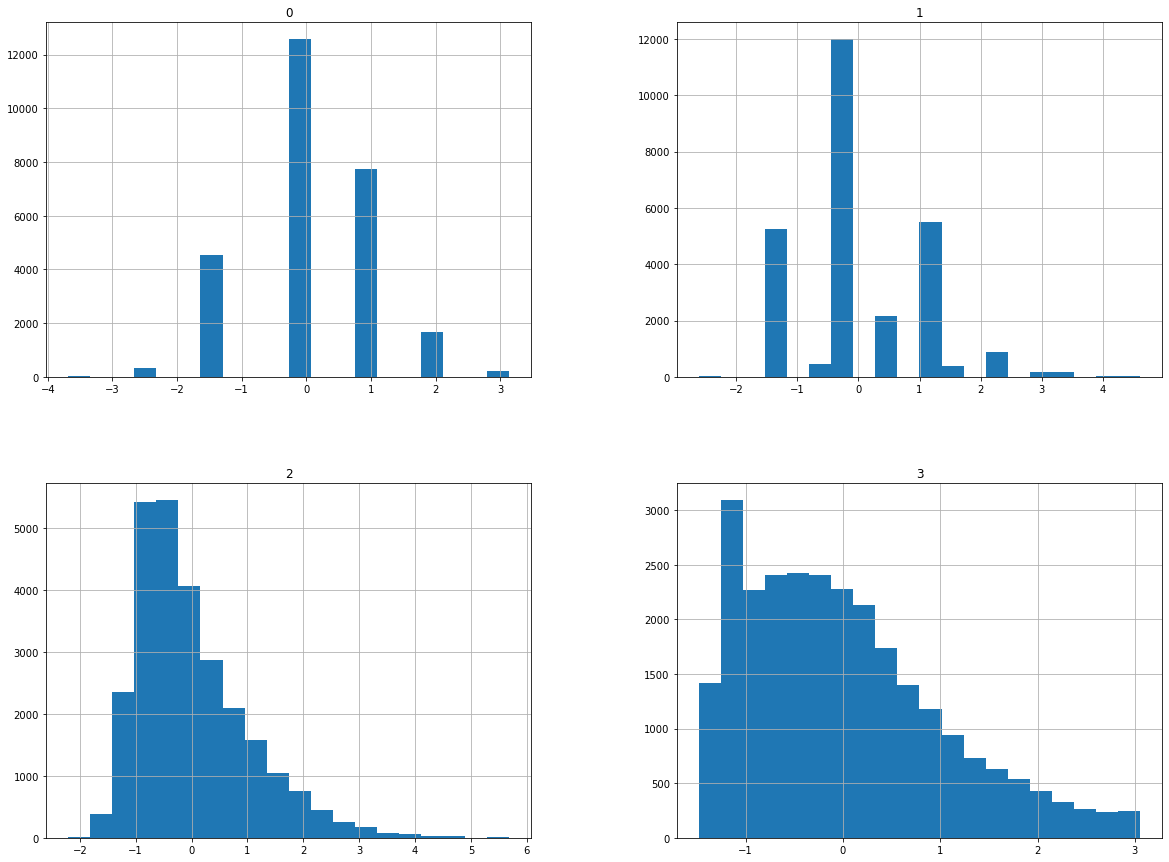

In [21]:
X_train_s_scaled_df.hist(bins = 20,figsize =  (20,15))

In [22]:
X_train_standard_scale

array([[-0.27376227, -0.20389128,  0.10499162, -1.22777536],
       [-0.27376227, -1.40685429, -0.94608169, -0.36849944],
       [ 0.86374328,  0.99907172,  2.06164683,  1.22760063],
       ...,
       [-1.41126782, -0.20389128, -0.40490811,  0.77788235],
       [ 0.86374328, -0.20389128,  0.28583605,  0.29812865],
       [ 0.86374328,  0.39759022,  1.22541128,  0.28423387]])

In [23]:

scaler3 = RobustScaler()
X_train_robust = scaler3.fit_transform(X_train)
X_validate_robust = scaler3.fit_transform(X_validate)
X_train_robust_df = pd.DataFrame(X_train_robust)
X_train_robust_df.head()

,0,1,2,3
0,0.0,0.0,0.278204,-0.766979
1,0.0,-1.0,-0.568456,-0.145272
2,1.0,1.0,1.854326,1.009544
3,0.0,-0.5,-0.191676,-0.082103
4,1.0,1.0,1.107338,0.132172


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

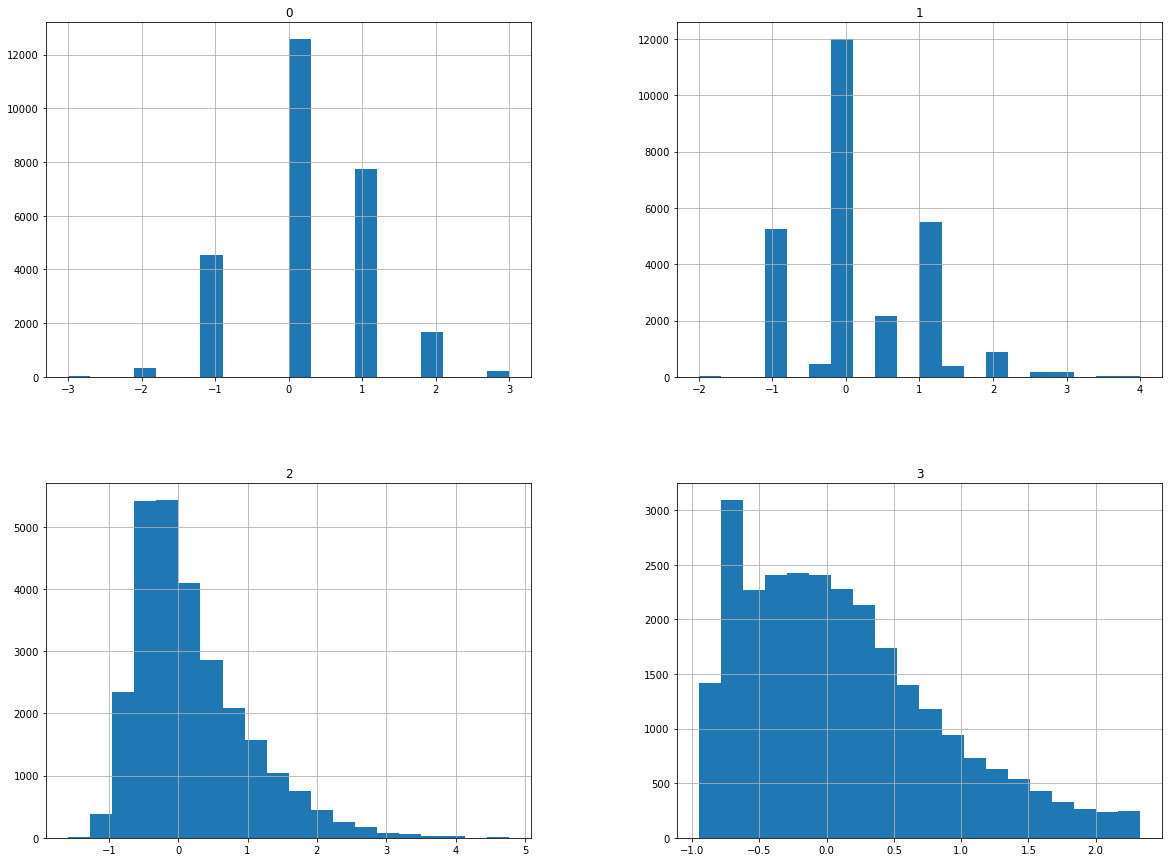

In [24]:
X_train_robust_df.hist(bins = 20,figsize =  (20,15))

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [25]:
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot


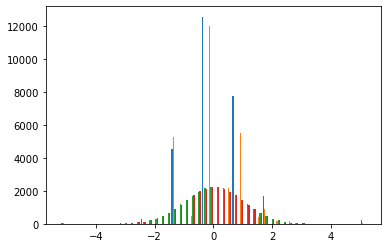

In [26]:
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(scaler)
# # histogram of the transformed data
# pyplot.hist(data_trans, bins=25)
# pyplot.show()
quintile_transformer = QuantileTransformer(output_distribution='normal')
X_train_Quant = quintile_transformer.fit_transform(X_train_robust_df)
# # histogram of the transformed data
plt.hist(X_train_Quant, bins=50)
plt.show()

Exercise 4: Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


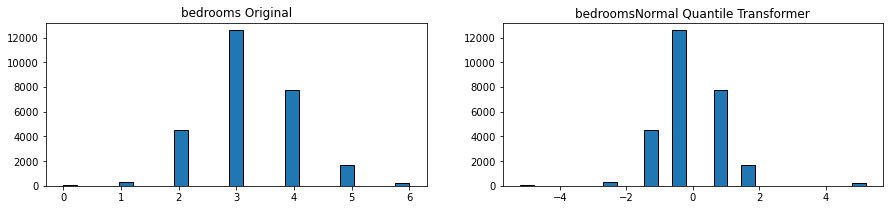

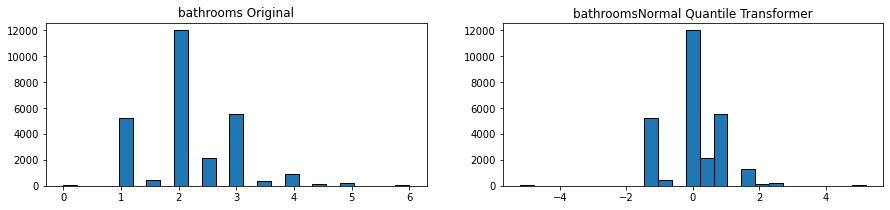

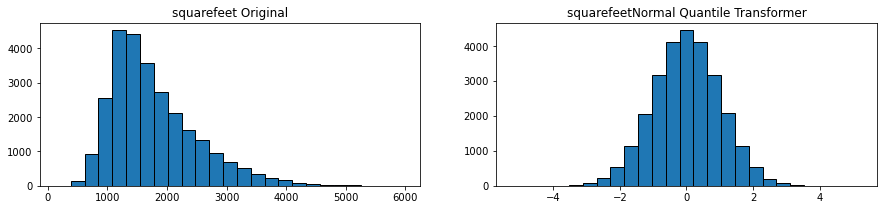

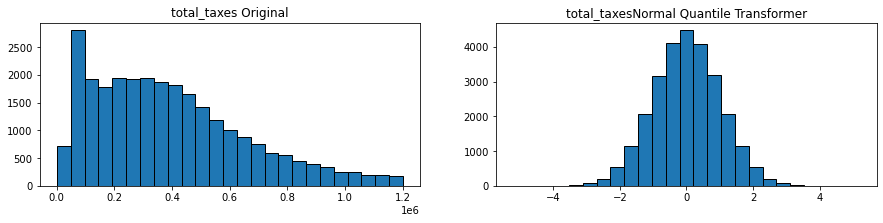

In [33]:

train1 = train[["bedrooms","bathrooms","squarefeet","total_taxes"]]

for column in train1.columns:
    robust_scaled = quintile_transformer.fit_transform(np.array(train1[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black', bins =25)
    plt.title(f'{column} Normal Quantile Transformer')



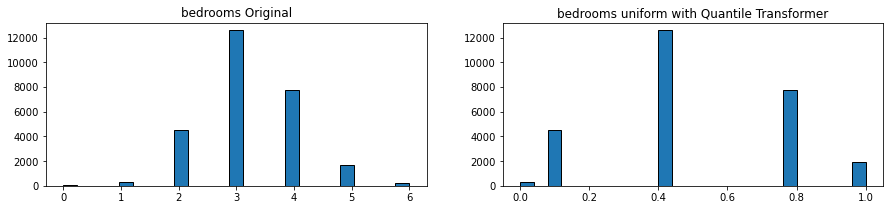

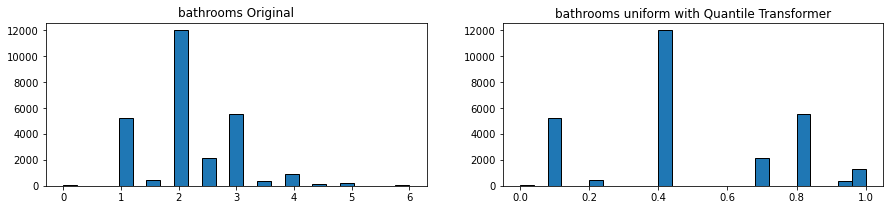

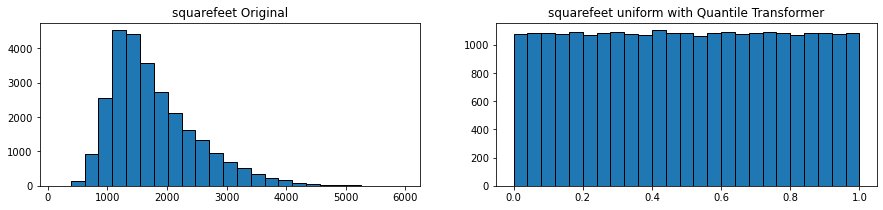

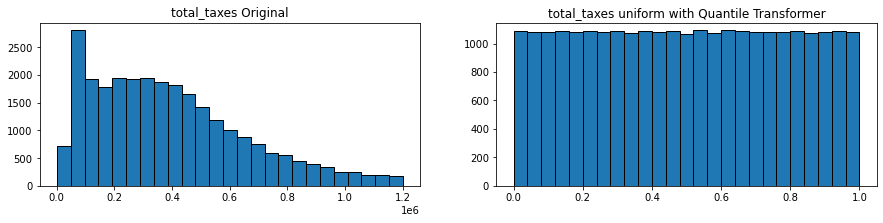

In [36]:
train1 = train[["bedrooms","bathrooms","squarefeet","total_taxes"]]
quant_trans = QuantileTransformer()

for column in train1.columns:
    robust_scaled = quant_trans.fit_transform(np.array(train1[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(robust_scaled, ec='black', bins =25)
    plt.title(f'{column} uniform with Quantile Transformer')


Exercise 5: Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [37]:
#this function takes the clean and split data, makes copies, uses the minmax scaler to scale the data for modeling purposes. 
def scaling_zillow(train, validate, test, columns_to_scale):

    '''
    This function takes in a data set that is split , makes a copy and uses the min max scaler to scale all three data sets. additionally it adds the columns names on the scaled data and returns trainedscaled data, validate scaled data and test scale
    '''
    #copying the dataframes for distinguishing between scaled and unscaled data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # defining the minmax scaler 
    scaler = MinMaxScaler()
    
    #scaling the trained data and giving the scaled data column names 
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.fit_transform(train[columns_to_scale]), 
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    
    #scaling the validate data and giving the scaled data column names 
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    
    #scaling the test data and giving the scaled data column names 
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])

    #returns three dataframes; train_scaled, validate_scaled, test_scaled
    return train_scaled, validate_scaled, test_scaled
